<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/daily_website_visitorsU3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

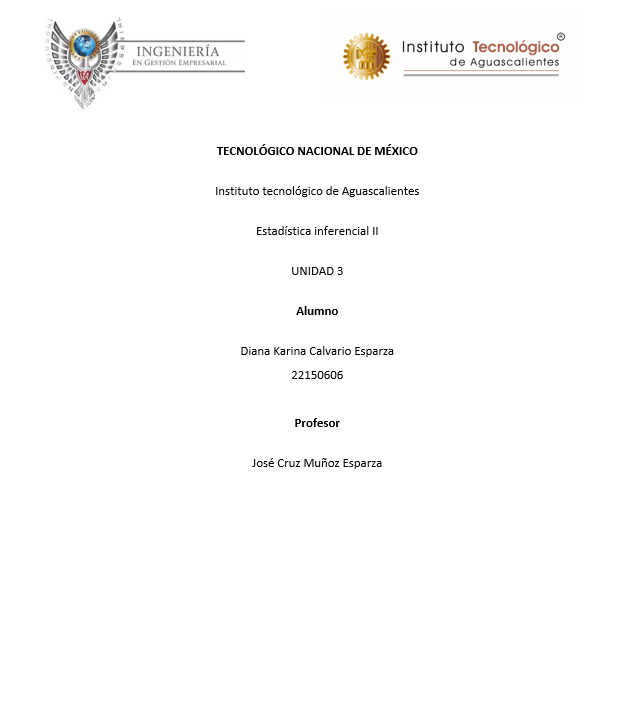

**Introducción**

Este proyecto se centra en el análisis de una serie temporal diaria del sitio web educativo statforecasting.com, con el objetivo de estudiar el comportamiento del tráfico (específicamente, el número de cargas de página) a lo largo del tiempo.

A partir de un conjunto de datos con más de cinco años de información, se aplicaron técnicas estadísticas de análisis temporal para explorar patrones como tendencia, estacionalidad y ciclos. Se filtraron exclusivamente los días sábado,para ver el comportamiento académico del sitio en un dia inavil para estudiantes, y se aplicaron métodos como suavización, pruebas de estacionariedad, regresión polinómica, transformada de Fourier y descomposición estacional. Esto permitió entender mejor cómo evolucionan las visitas en el tiempo y qué factores podrían estar influyendo de forma cíclica.

**Metodología**

Se utilizó el archivo daily-website-visitors.csv.
Se eliminaron columnas innecesarias y se filtraron los datos para conservar solo los días sábado, con lo que se obtuvo una muestra de 309 registros.

Análisis de tendencia:
Se aplicaron dos métodos de suavización:
Promedio Móvil Simple (SMA) con ventana de 500 días.
Suavización Exponencial (SES) con ventana de 40 días.
Esto permitió observar tendencias generales y fluctuaciones recientes en el flujo de visitas.

Prueba de estacionariedad:
Se utilizó la prueba de Dickey-Fuller aumentada (ADF).
El resultado (p-value = 0.000066) indicó que la serie era estacionaria, lo cual es importante para modelos de predicción.

Regresión Polinómica:
Se ajustó un modelo polinómico de grado 3 sobre el tiempo.
Se obtuvo una curva de tendencia no lineal y se analizaron los residuales para evaluar las desviaciones del modelo.

Transformada de Fourier:
Se aplicó a los residuales del modelo polinómico para detectar ciclos ocultos.
Se identificaron frecuencias dominantes con longitudes de onda de aproximadamente 26, 51 y 154 días, lo cual sugiere patrones de comportamiento cíclico en el tráfico.

Descomposición Estacional:
Se descompuso la serie en sus componentes: tendencia, estacionalidad y residuales.
Las gráficas resultantes confirmaron la presencia de una estacionalidad fuerte, relacionada posiblemente con calendarios académicos y días específicos.



**Marco Teórico**

El análisis de series temporales permite entender cómo evoluciona una variable a lo largo del tiempo. En este proyecto, se trabajó con el número de cargas de página como serie principal. Para su análisis se aplicaron los siguientes conceptos y métodos:

Promedio Móvil Simple (SMA): Ayuda a suavizar la serie y observar la tendencia general. Es útil para eliminar ruido.

Suavización Exponencial (SES): Otorga más peso a los valores recientes, permitiendo captar cambios de corto plazo.

Estacionariedad (ADF): La prueba de Dickey-Fuller permite determinar si la serie tiene propiedades estadísticas constantes en el tiempo. La estacionariedad es crucial para ciertos modelos predictivos.

Regresión Polinómica: Permite modelar relaciones no lineales entre la variable dependiente (visitas) y el tiempo.

Transformada de Fourier: Descompone la serie en componentes sinusoidales, lo que permite detectar frecuencias dominantes y ciclos periódicos ocultos.

Descomposición Estacional: Separa la serie en tres componentes principales:

Tendencia: Cambio general a lo largo del tiempo.

Estacionalidad: Patrón que se repite con cierta regularidad.

Ruido o residuales: Variaciones no explicadas por los componentes anteriores.

Estos métodos permitieron analizar en profundidad cómo se comporta el tráfico del sitio en función del tiempo, y abren la puerta a posibles modelos de pronóstico.

In [159]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Dianacalvario/estadisticaverano/refs/heads/main/daily-website-visitors.csv")

df

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...,...,...
2162,2163,Saturday,7,8/15/2020,"2,221","1,696","1,373",323
2163,2164,Sunday,1,8/16/2020,"2,724","2,037","1,686",351
2164,2165,Monday,2,8/17/2020,"3,456","2,638","2,181",457
2165,2166,Tuesday,3,8/18/2020,"3,581","2,683","2,184",499


In [160]:
df.columns

Index(['Row', 'Day', 'Day.Of.Week', 'Date', 'Page.Loads', 'Unique.Visits',
       'First.Time.Visits', 'Returning.Visits'],
      dtype='object')

In [161]:
df.drop(columns=["Day", "Row"], inplace=True)
df

,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,9/14/2014,"2,146","1,582","1,430",152
1,2,9/15/2014,"3,621","2,528","2,297",231
2,3,9/16/2014,"3,698","2,630","2,352",278
3,4,9/17/2014,"3,667","2,614","2,327",287
4,5,9/18/2014,"3,316","2,366","2,130",236
...,...,...,...,...,...,...
2162,7,8/15/2020,"2,221","1,696","1,373",323
2163,1,8/16/2020,"2,724","2,037","1,686",351
2164,2,8/17/2020,"3,456","2,638","2,181",457
2165,3,8/18/2020,"3,581","2,683","2,184",499


In [162]:
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df

,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,2014-09-14,"2,146","1,582","1,430",152
1,2,2014-09-15,"3,621","2,528","2,297",231
2,3,2014-09-16,"3,698","2,630","2,352",278
3,4,2014-09-17,"3,667","2,614","2,327",287
4,5,2014-09-18,"3,316","2,366","2,130",236
...,...,...,...,...,...,...
2162,7,2020-08-15,"2,221","1,696","1,373",323
2163,1,2020-08-16,"2,724","2,037","1,686",351
2164,2,2020-08-17,"3,456","2,638","2,181",457
2165,3,2020-08-18,"3,581","2,683","2,184",499


In [163]:
df.sort_values("Date", inplace=True)
df

,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,2014-09-14,"2,146","1,582","1,430",152
1,2,2014-09-15,"3,621","2,528","2,297",231
2,3,2014-09-16,"3,698","2,630","2,352",278
3,4,2014-09-17,"3,667","2,614","2,327",287
4,5,2014-09-18,"3,316","2,366","2,130",236
...,...,...,...,...,...,...
2162,7,2020-08-15,"2,221","1,696","1,373",323
2163,1,2020-08-16,"2,724","2,037","1,686",351
2164,2,2020-08-17,"3,456","2,638","2,181",457
2165,3,2020-08-18,"3,581","2,683","2,184",499


In [164]:
df=df[df["Day.Of.Week"]==7]

In [165]:
df.set_index("Date", inplace=True)
df

,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,
2014-09-20,7,"1,658","1,118",985,133
2014-09-27,7,"1,656","1,180","1,040",140
2014-10-04,7,"2,054","1,436","1,274",162
2014-10-11,7,"2,080","1,457","1,280",177
2014-10-18,7,"2,285","1,619","1,416",203
...,...,...,...,...,...
2020-07-18,7,"2,416","1,892","1,606",286
2020-07-25,7,"2,400","1,767","1,487",280
2020-08-01,7,"2,305","1,750","1,479",271


/tmp/ipython-input-166-1515778086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)
/tmp/ipython-input-166-1515778086.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SMA'] = df['Page.Loads'].ewm(span=ventana_sma, adjust=False).mean()
/tmp/ipython-input-166-1515778086.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

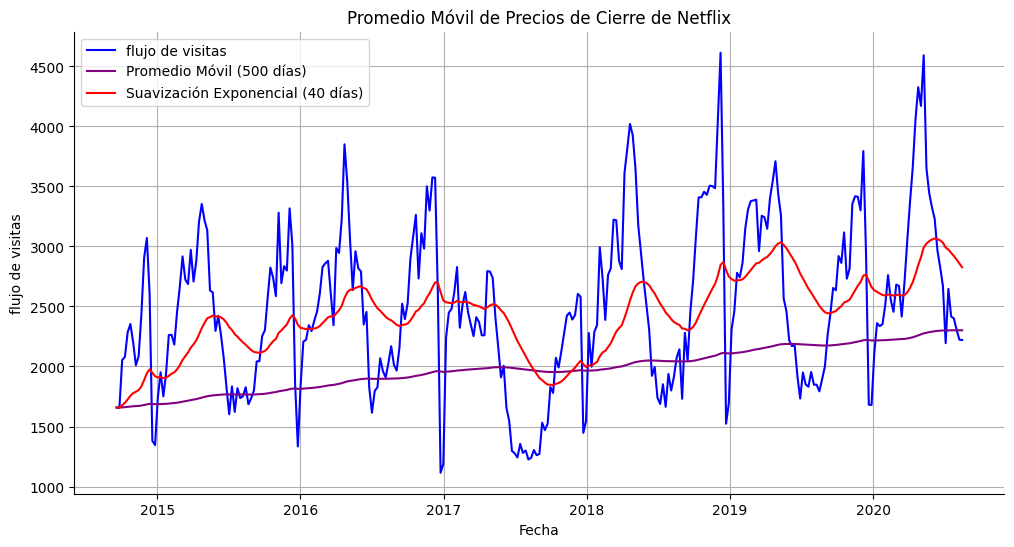

In [166]:
import matplotlib.pyplot as plt
# Convert 'Page.Loads' to numeric
df['Page.Loads'] = df['Page.Loads'].str.replace(',', '').astype(int)

# Promedio Móvil Simple
ventana_sma = 500
df['SMA'] = df['Page.Loads'].ewm(span=ventana_sma, adjust=False).mean()

# Promedio Móvil Exponencial
ventana_ses = 40
df['SES'] = df['Page.Loads'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['Page.Loads'], label='flujo de visitas', color='blue')
plt.plot(df['SMA'], label=f'Promedio Móvil ({ventana_sma} días)', color='purple')
plt.plot(df['SES'], label=f'Suavización Exponencial ({ventana_ses} días)', color='red')
plt.title('Promedio Móvil de Precios de Cierre de Netflix')
plt.xlabel('Fecha')
plt.ylabel('flujo de visitas')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [167]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Page.Loads'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -4.755501596177681
p-value: 6.611083080064459e-05
La tendencia es estacionaria (rechazamos la hipótesis nula).


/tmp/ipython-input-168-174085346.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)
/tmp/ipython-input-168-174085346.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Poly_Trend'] = modelo(X)
/tmp/ipython-input-168-174085346.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

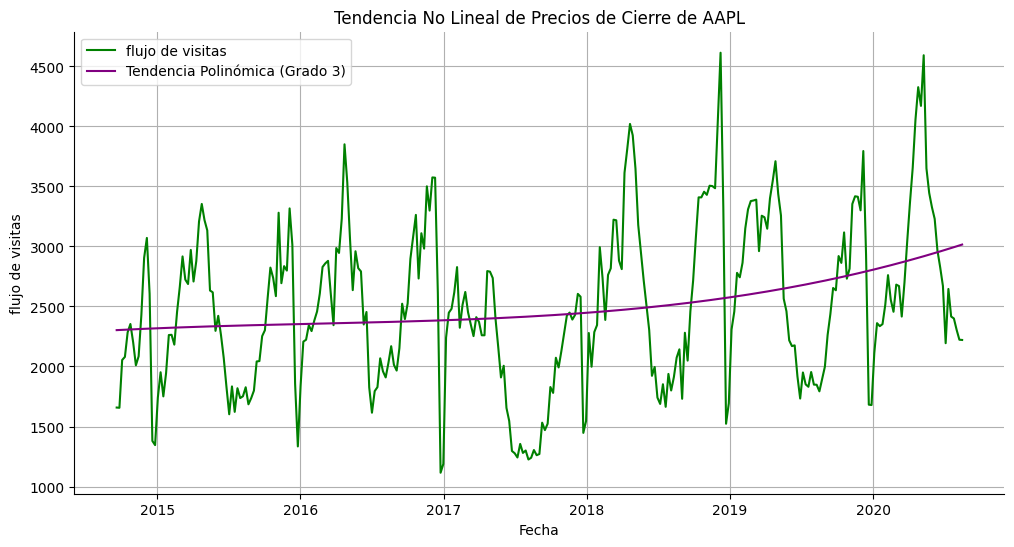

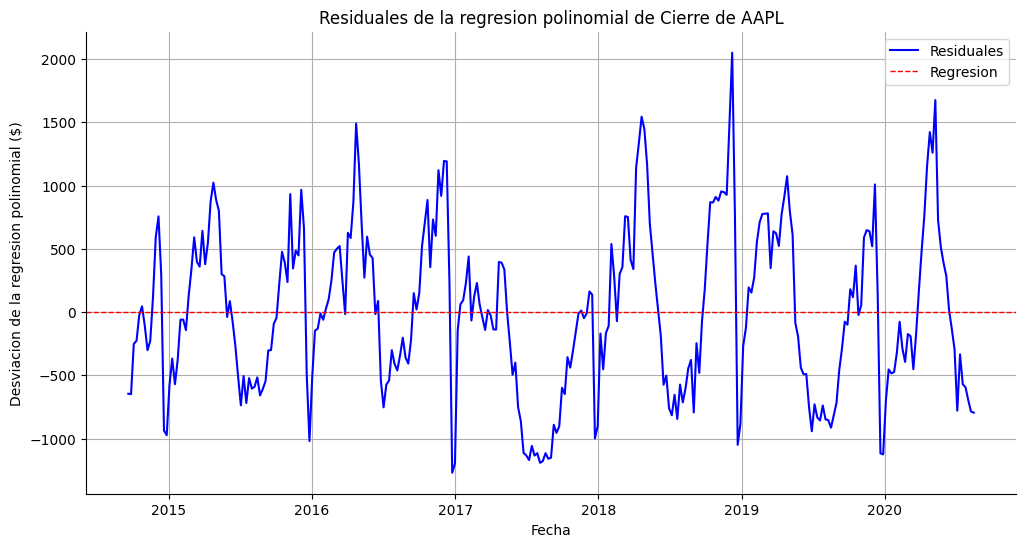

In [168]:
from numpy.polynomial.polynomial import Polynomial

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
df['Date'] = pd.to_datetime(df.index).map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = df['Date']
y = df['Page.Loads']

# Paso 3: Ajustar un modelo polinómico
grado = 3
modelo = Polynomial.fit(X, y, deg = grado)
df['Poly_Trend'] = modelo(X)
df['Poly_Resid'] = y - df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='flujo de visitas', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Precios de Cierre de AAPL') # Título
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('flujo de visitas')                                # nombre del eje y
plt.legend()                                                  # agrega la leyenda
plt.grid()                                                    # agrega una cuadrícula
plt.gca().spines['top'].set_visible(False)                    # elimina los bordes superiores
plt.gca().spines['right'].set_visible(False)                  # elimina los bordes derechos
plt.show()                                                    # muestra el gráfico (innecesario en colab)




# Graficar los residuales del polinomio
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Poly_Resid'], label='Residuales', color='blue')
plt.axhline(0, color='red', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresion polinomial de Cierre de AAPL')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [169]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AAPL_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

/tmp/ipython-input-169-754283725.py:30: RuntimeWarning: divide by zero encountered in divide
  'longitud_de_onda': 1 / frecuencias


Frecuencias principales:
    frecuencia      magnitud  longitud_de_onda
0    0.038835  81011.226755            25.750
1    0.019417  59167.161768            51.500
2    0.006472  33594.055944           154.500
3    0.009709  33497.156374           103.000
4    0.077670  29299.365918            12.875


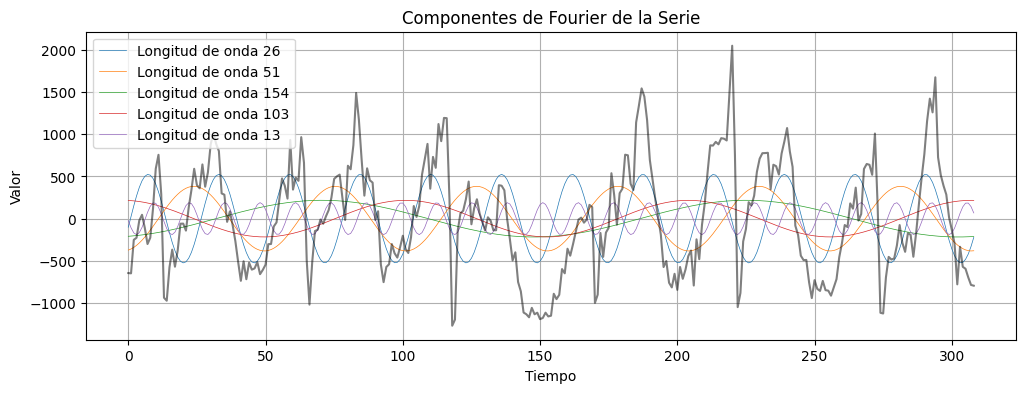

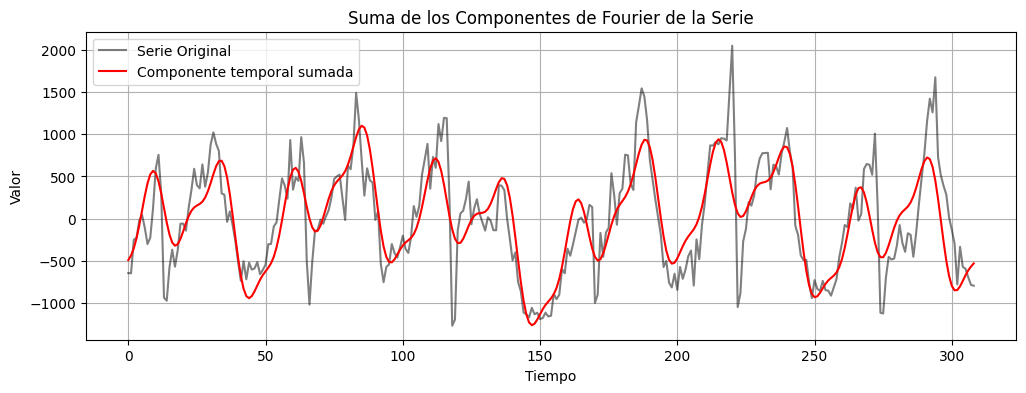

In [170]:
serie = df['Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

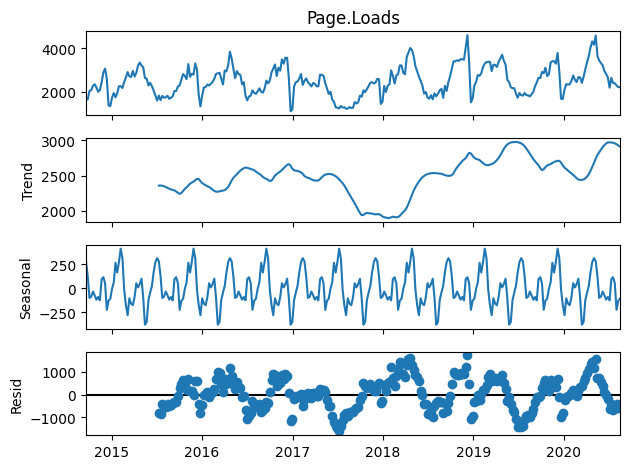

In [171]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion = sm.tsa.seasonal_decompose(
    df['Page.Loads'],
    model='additive',
    period=42,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion.plot()
plt.show()

In [172]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(df['Page.Loads'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: -4.755501596177681
p-value: 6.611083080064459e-05
La tendencia es estacionaria (rechazamos la hipótesis nula).


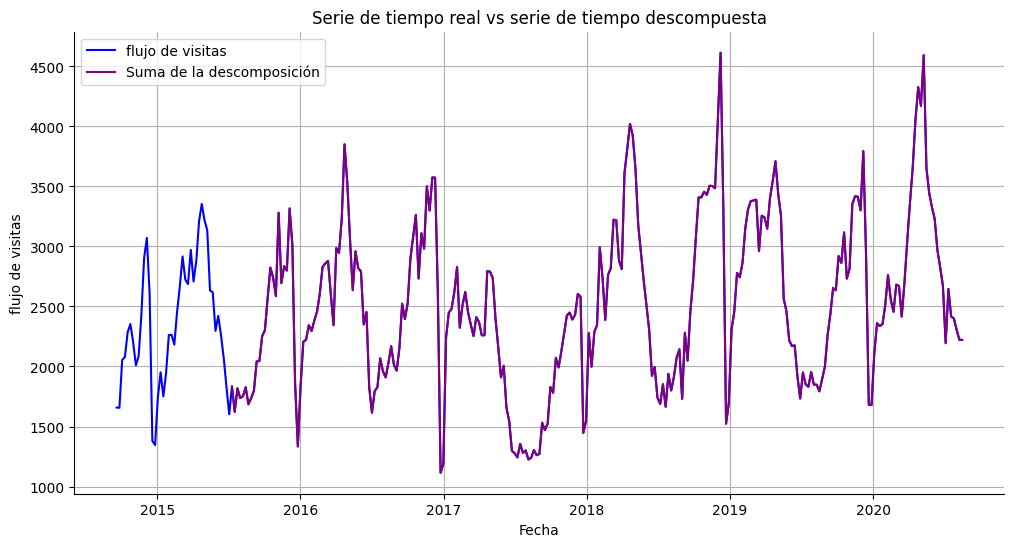

In [173]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Page.Loads'], label='flujo de visitas', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta')
plt.xlabel('Fecha')
plt.ylabel('flujo de visitas')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

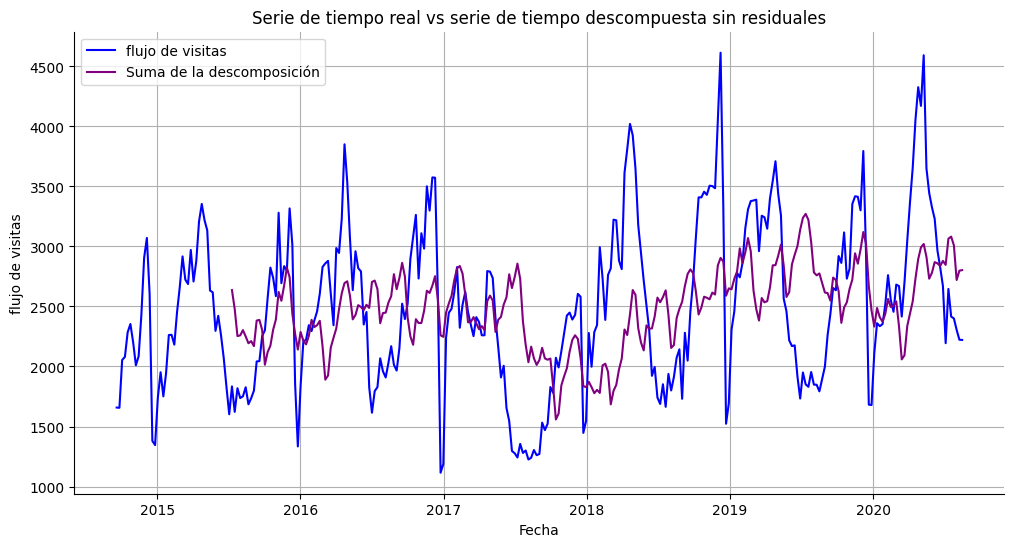

In [174]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Page.Loads'], label='flujo de visitas', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('flujo de visitas')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

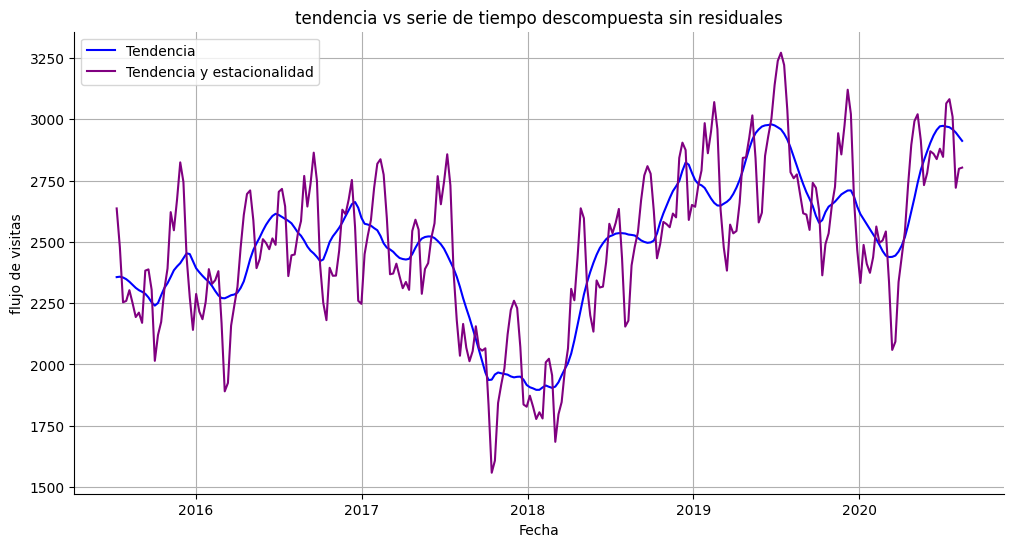

In [175]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(descomposicion.trend, label='Tendencia', color='blue')
plt.plot(descomposicion.trend + descomposicion.seasonal, label=f'Tendencia y estacionalidad', color='purple')
plt.title('tendencia vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('flujo de visitas')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

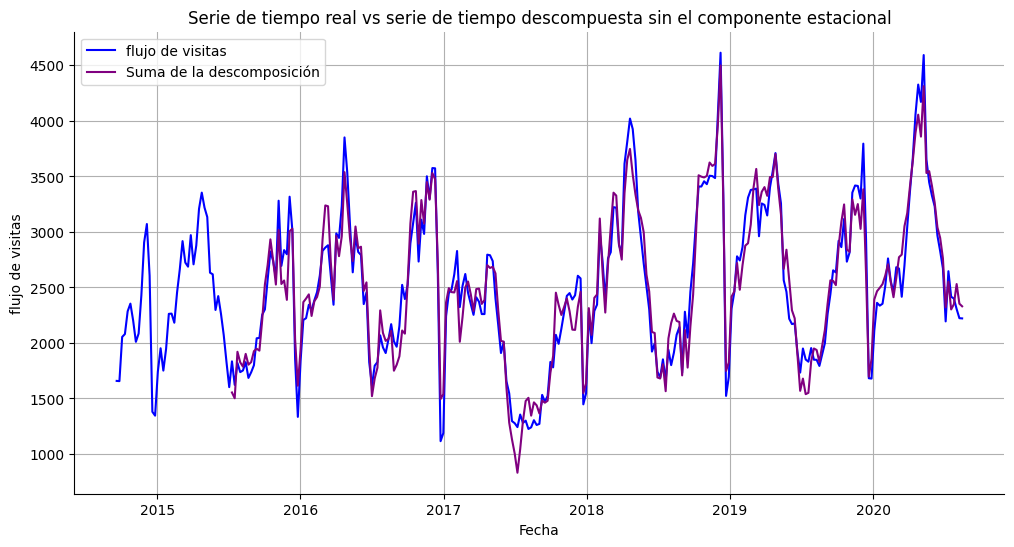

In [176]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['Page.Loads'], label='flujo de visitas', color='blue')
plt.plot(descomposicion.trend + descomposicion.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('flujo de visitas')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [176]:
#Dickey-Fuller Estadístico ADF: -4.76
#Valor p: 0.000066 Se rechaza la hipótesis nula, lo que indica que la serie es estacionaria.
#Fourier La frecuencia dominante tiene una longitud de onda de aproximadamente 26 días, lo que sugiere un ciclo mensual.
#Regresión polinomica Se visualiza una curva que sigue bien los cambios de tendencia del tráfico.Los residuales se ven distribuidos alrededor de cero, sin patrón obvio fuerte.
#Descomposición Estacional nos indica una tendencia general creciente y luego decreciente con una estacionalidad repetitiva cada cierto número de semanas y residuales relativamente pequeños, lo cual indica buen ajuste del modelo.


**Conclusión general**
Como se pudo observar con el trabajo realizado anteriormente gracias a alas tecnicas aplicadas permitieron entender con profundidad el comportamiento de las visitas durante los días sábado, revelando patrones relevantes tanto en el corto como en el largo plazo.

El Promedio Móvil Simple (SMA) mostró una tendencia de largo plazo suave, destacando un incremento sostenido en visitas en ciertos años y una caída posterior.

La Suavización Exponencial (SES) captó mejor las variaciones de corto plazo, evidenciando los picos semanales que no eran tan visibles en el SMA. Esto permitió detectar cambios recientes o comportamientos atípicos.

La prueba ADF (Dickey-Fuller) arrojó un valor p de 0.000066, lo que permitió rechazar la hipótesis nula y confirmar que la serie es estacionaria, es decir, sus propiedades estadísticas se mantienen constantes en el tiempo.

La regresión polinómica ayudó a modelar la tendencia general no lineal, y los residuales extraídos permitieron analizar la parte de la serie no explicada por esa tendencia.

Aplicando la Transformada de Fourier sobre los residuales se identificaron 5 frecuencias dominantes, con longitudes de onda de 26, 51, 154, 103 y 13 días, lo que confirmó la existencia de ciclos regulares y repetitivos en el tráfico, probablemente relacionados con hábitos semanales o periodos escolares.

La Descomposición Estacional reveló tres componentes:
Una tendencia clara en ascenso y descenso a lo largo de los años.
Una estacionalidad fuerte y repetitiva, probablemente ligada a los ciclos académicos y al día de la semana.
Residuales o ruido con baja variabilidad, lo cual indica que tanto la tendencia como la estacionalidad explican bien la mayoría del comportamiento de la serie.

En conjunto, los métodos aplicados mostraron que el comportamiento del tráfico en el sitio no es aleatorio, sino que sigue **patrones predecibles**

